In [1]:
import pandas as pd
import numpy as np
from gensim.models import doc2vec
from gensim.models.doc2vec import  Doc2Vec

In [2]:
df=pd.read_csv('clean_data.csv')
df.head()

,Unnamed: 0,ID,text,clean_text
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo


In [3]:
word_list=[]

In [4]:
for i in df['clean_text']:
    i=str(i)
    li=list(i.split(" "))
    word_list.append(li)
    
    

In [5]:
word_list

[['person',
  'profess',
  'practice',
  'propagate',
  'religion',
  'he',
  'she',
  'belief',
  'religious',
  'group',
  'sect',
  'free',
  'manage',
  'religious',
  'affair',
  'propagate',
  'religion',
  'person',
  'compel',
  'person',
  'convert',
  'his',
  'religion',
  'force',
  'fraud',
  'inducement',
  'allurement',
  'person',
  'free',
  'change',
  'religion',
  'his',
  'her',
  'freedom',
  'practice',
  'religion',
  'person',
  'he',
  'religion',
  'sacrifice',
  'animal',
  'human',
  'being',
  'offering',
  'supernatural',
  'force',
  'god',
  'religious',
  'practice',
  'treat',
  'woman',
  'inferior',
  'infringe',
  'woman',
  'freedom',
  'allowed',
  'force',
  'widowed',
  'woman',
  'shave',
  'head',
  'wear',
  'white',
  'clothes'],
 ['pigment',
  'particle',
  'mix',
  'vehicle',
  'particle',
  'distributed',
  'equal',
  'distance',
  'liquid'],
 ['prime',
  'minister',
  'india',
  'leader',
  'ruling',
  'party',
  'lok',
  'sabha',
  'mp

In [6]:
len(word_list)

2000

In [7]:
  for i, list_of_words in enumerate(word_list):
        
        print(i)
        print(list_of_words)
        break

0
['person', 'profess', 'practice', 'propagate', 'religion', 'he', 'she', 'belief', 'religious', 'group', 'sect', 'free', 'manage', 'religious', 'affair', 'propagate', 'religion', 'person', 'compel', 'person', 'convert', 'his', 'religion', 'force', 'fraud', 'inducement', 'allurement', 'person', 'free', 'change', 'religion', 'his', 'her', 'freedom', 'practice', 'religion', 'person', 'he', 'religion', 'sacrifice', 'animal', 'human', 'being', 'offering', 'supernatural', 'force', 'god', 'religious', 'practice', 'treat', 'woman', 'inferior', 'infringe', 'woman', 'freedom', 'allowed', 'force', 'widowed', 'woman', 'shave', 'head', 'wear', 'white', 'clothes']


In [52]:
def tagged_document(list_of_list_of_words):
    
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield doc2vec.TaggedDocument(list_of_words, [i])
data_training = list(tagged_document(word_list))
data_training

[TaggedDocument(words=['person', 'profess', 'practice', 'propagate', 'religion', 'he', 'she', 'belief', 'religious', 'group', 'sect', 'free', 'manage', 'religious', 'affair', 'propagate', 'religion', 'person', 'compel', 'person', 'convert', 'his', 'religion', 'force', 'fraud', 'inducement', 'allurement', 'person', 'free', 'change', 'religion', 'his', 'her', 'freedom', 'practice', 'religion', 'person', 'he', 'religion', 'sacrifice', 'animal', 'human', 'being', 'offering', 'supernatural', 'force', 'god', 'religious', 'practice', 'treat', 'woman', 'inferior', 'infringe', 'woman', 'freedom', 'allowed', 'force', 'widowed', 'woman', 'shave', 'head', 'wear', 'white', 'clothes'], tags=[0]),
 TaggedDocument(words=['pigment', 'particle', 'mix', 'vehicle', 'particle', 'distributed', 'equal', 'distance', 'liquid'], tags=[1]),
 TaggedDocument(words=['prime', 'minister', 'india', 'leader', 'ruling', 'party', 'lok', 'sabha', 'mp', 'belong', 'her', 'party', 'prime', 'minister', 'selects', 'minister', 

In [9]:
model = Doc2Vec(vector_size=40, min_count=2, epochs=30)

In [19]:
model.train(data_training,total_examples=model.corpus_count,epochs=model.epochs)

In [18]:
model.build_vocab(data_training)


In [20]:
print(model.infer_vector("person profess practice propagate religion he".split()))

[-0.05463523  0.03811601 -0.00660672  0.09759548  0.03775877 -0.02573765
 -0.05712233 -0.01848135 -0.10311206  0.04806262  0.00828842  0.05327086
  0.01111306  0.06769813  0.14248922  0.05675001 -0.03930059  0.0003309
 -0.06827957 -0.17675263  0.0029367  -0.01552185  0.12842299  0.01549567
 -0.116648   -0.00480274  0.02614238  0.22513708 -0.1167661   0.06810996
  0.08634615  0.01049142  0.081707    0.01848418  0.00313946  0.13926817
  0.21161899 -0.22505645 -0.13495056 -0.1411677 ]


In [21]:
li=[]
for i in df['clean_text']:
    li.append(model.infer_vector(str(i).split()))
    

In [22]:
df['doc2vec']=li

In [23]:
df.head()

,Unnamed: 0,ID,text,clean_text,doc2vec
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...,"[-0.16475071, -0.018409247, 0.034483686, 0.396..."
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...,"[-0.029484179, 0.08626844, -0.0131324325, 0.02..."
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...,"[0.66086817, -0.4117601, -0.32984415, 0.448142..."
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe,"[-0.00996471, 0.062205594, -0.020610046, 0.029..."
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo,"[-0.062834784, -0.0032937368, 0.049925696, -0...."


In [24]:
cos_with_0=[]
cos_with_1=[]

In [25]:
from numpy.linalg import norm
def cosine_sim(a1,a2):
    cosine=np.dot(a1,a2)/(norm(a1)*norm(a2))
    return cosine
        
    
    
    

In [26]:
bias_df=pd.read_csv("pairs-label-training (1).txt")
bias_df.head()

,p1,p2,bias
0,98,651,0
1,696,1870,1
2,1073,1620,0
3,167,633,0
4,4,640,0


In [27]:
def find_cosine(df,bias_df,bias):
    cos_sim=[]
    for i,rows in bias_df[bias_df['bias']==bias].iterrows():
        s1=df[df['ID']==rows['p1']].iloc[0,4]
        s2=df[df['ID']==rows['p2']].iloc[0,4]
        cos_sim.append(cosine_sim(s1,s2))
    return cos_sim    

In [28]:
cos_with_0=find_cosine(df,bias_df,0)
cos_with_1=find_cosine(df,bias_df,1)

In [29]:
cos_with_0

[0.50158423,
 0.6879345,
 0.85642695,
 0.81820744,
 0.26669347,
 0.95311165,
 0.9555533,
 0.92886156,
 0.7488565,
 0.37132597,
 0.95703274,
 0.6222937,
 0.8610554,
 0.2191109,
 0.64166635,
 0.6150094,
 0.27713552,
 0.33350044,
 0.8940255,
 0.119507246,
 0.5646129,
 0.86809605,
 0.2681652,
 0.94688684,
 0.7032526,
 0.898768,
 0.1343752,
 0.48789203,
 0.9603494,
 0.7708347,
 -0.71873033,
 0.4780616,
 0.8322041,
 -0.051438157,
 0.91373664,
 0.87417156,
 -0.76210314,
 0.92601734,
 0.8962625,
 -0.019566735,
 0.63415474,
 0.30555928,
 0.6494389,
 0.74328756,
 0.3515709,
 0.5051535,
 0.2473577,
 0.7090313,
 0.81276345,
 0.97730863,
 0.96880966,
 0.8901595,
 0.7795711,
 0.00564675,
 0.95146555,
 0.9478546,
 0.6367308,
 0.31414086,
 0.5131489,
 0.55533606,
 0.7913284,
 0.47341502,
 0.3990872,
 0.927625,
 -0.19538057,
 0.45009312,
 0.16149165,
 0.7174887,
 0.012481989,
 0.9341704,
 0.36101413,
 0.030307751,
 0.40942624,
 0.94043106,
 0.9724745,
 0.916327,
 0.96251243,
 0.7912012,
 0.56415164,
 0

In [30]:
cos_with_1

[0.70295084,
 0.25958714,
 0.8159882,
 0.9849818,
 0.3954286,
 0.7571349,
 0.52974164,
 0.9562466,
 0.32011822,
 0.3017151,
 0.6169519,
 0.5233682,
 0.33881634,
 0.73040736,
 -0.3329991,
 0.43743807,
 0.7166435,
 0.64420944,
 0.8352072,
 -0.06194257,
 0.77394956,
 0.9066735,
 0.14194311,
 0.938446,
 0.3024706,
 0.5912265,
 0.90786976,
 0.5700726,
 0.8430751,
 0.8597661,
 0.45422223,
 0.73656267,
 0.8070052,
 0.34350806,
 0.45531243,
 0.944837,
 0.7158191,
 0.54692924,
 0.90370363,
 0.7133605,
 0.15782046,
 0.7917609,
 0.858837,
 0.93956876,
 0.92794377,
 0.9499599,
 0.4807843,
 0.6486419,
 0.8609118,
 0.32008052,
 0.9149204,
 0.91051143,
 0.8998064,
 0.92290735,
 0.6631673,
 0.9326491,
 0.78940135,
 0.419222,
 0.2195702,
 0.9250575,
 0.42703444,
 0.9680635,
 0.69235194,
 0.9710355,
 0.9797573,
 0.85998815,
 0.7205172,
 0.40870526,
 0.92795104,
 0.57157904,
 0.38255164,
 0.14758131,
 0.5433807,
 0.47273964,
 0.73030967,
 0.943385,
 0.19315965,
 0.91273606,
 0.44214764,
 0.57248825,
 0.3

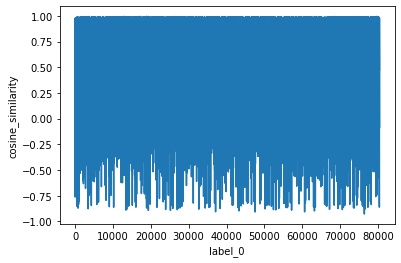

In [49]:
import matplotlib.pyplot as pp
pp.plot(cos_with_0)
pp.ylabel('cosine_similarity')
pp.xlabel('label_0')
pp.savefig('cosine_0',transparent=True)

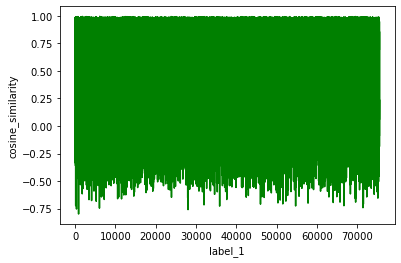

In [50]:
pp.plot(cos_with_1,'g')
pp.ylabel('cosine_similarity')
pp.xlabel('label_1')
pp.savefig('cosine_1',transparent=True)

In [33]:
total_values=cos_with_0 +cos_with_1

In [34]:
total_values

[0.50158423,
 0.6879345,
 0.85642695,
 0.81820744,
 0.26669347,
 0.95311165,
 0.9555533,
 0.92886156,
 0.7488565,
 0.37132597,
 0.95703274,
 0.6222937,
 0.8610554,
 0.2191109,
 0.64166635,
 0.6150094,
 0.27713552,
 0.33350044,
 0.8940255,
 0.119507246,
 0.5646129,
 0.86809605,
 0.2681652,
 0.94688684,
 0.7032526,
 0.898768,
 0.1343752,
 0.48789203,
 0.9603494,
 0.7708347,
 -0.71873033,
 0.4780616,
 0.8322041,
 -0.051438157,
 0.91373664,
 0.87417156,
 -0.76210314,
 0.92601734,
 0.8962625,
 -0.019566735,
 0.63415474,
 0.30555928,
 0.6494389,
 0.74328756,
 0.3515709,
 0.5051535,
 0.2473577,
 0.7090313,
 0.81276345,
 0.97730863,
 0.96880966,
 0.8901595,
 0.7795711,
 0.00564675,
 0.95146555,
 0.9478546,
 0.6367308,
 0.31414086,
 0.5131489,
 0.55533606,
 0.7913284,
 0.47341502,
 0.3990872,
 0.927625,
 -0.19538057,
 0.45009312,
 0.16149165,
 0.7174887,
 0.012481989,
 0.9341704,
 0.36101413,
 0.030307751,
 0.40942624,
 0.94043106,
 0.9724745,
 0.916327,
 0.96251243,
 0.7912012,
 0.56415164,
 0

In [35]:
type(total_values)

list

In [36]:
total_values_1=list(filter(lambda x : x <=0.5,total_values))

In [37]:
print(total_values_1)

[0.26669347, 0.37132597, 0.2191109, 0.27713552, 0.33350044, 0.119507246, 0.2681652, 0.1343752, 0.48789203, -0.71873033, 0.4780616, -0.051438157, -0.76210314, -0.019566735, 0.30555928, 0.3515709, 0.2473577, 0.00564675, 0.31414086, 0.47341502, 0.3990872, -0.19538057, 0.45009312, 0.16149165, 0.012481989, 0.36101413, 0.030307751, 0.40942624, 0.41970608, 0.21374644, -0.3004947, 0.2812064, -0.464857, -0.01705038, -0.10257551, 0.36630243, 0.44716817, 0.35426992, 0.04722505, -0.33459914, 0.20587906, 0.4723938, 0.41742375, 0.36897755, 0.32778004, -0.09648376, 0.17680955, -0.034479182, 0.48175946, 0.18920282, 0.46868977, 0.49949378, 0.39221916, 0.34303412, 0.38899326, 0.46677485, 0.45161226, 0.40552762, 0.3918349, 0.16216384, -0.1397551, 0.21966279, -0.6595727, 0.4230161, -0.25317016, -0.1717598, 0.4292944, 0.478824, 0.3505518, 0.0009247641, 0.33588684, -0.009173664, -0.11855764, 0.46415707, 0.11679906, 0.3983293, -0.240159, 0.35777143, -0.020603515, 0.24916798, 0.4446222, 0.37618685, 0.4795479,

In [38]:
total_values_0=list(filter(lambda x:x>0.5,total_values))
print(total_values_0)

[0.50158423, 0.6879345, 0.85642695, 0.81820744, 0.95311165, 0.9555533, 0.92886156, 0.7488565, 0.95703274, 0.6222937, 0.8610554, 0.64166635, 0.6150094, 0.8940255, 0.5646129, 0.86809605, 0.94688684, 0.7032526, 0.898768, 0.9603494, 0.7708347, 0.8322041, 0.91373664, 0.87417156, 0.92601734, 0.8962625, 0.63415474, 0.6494389, 0.74328756, 0.5051535, 0.7090313, 0.81276345, 0.97730863, 0.96880966, 0.8901595, 0.7795711, 0.95146555, 0.9478546, 0.6367308, 0.5131489, 0.55533606, 0.7913284, 0.927625, 0.7174887, 0.9341704, 0.94043106, 0.9724745, 0.916327, 0.96251243, 0.7912012, 0.56415164, 0.66002136, 0.6367471, 0.9020484, 0.7823151, 0.97056633, 0.96059144, 0.7730896, 0.8999601, 0.54589856, 0.94688106, 0.5222751, 0.93384206, 0.98017657, 0.7738739, 0.92848605, 0.8326425, 0.9772792, 0.9118277, 0.9507008, 0.94398093, 0.7666555, 0.59153926, 0.8858317, 0.72859776, 0.97165185, 0.6286361, 0.86822236, 0.921135, 0.9393519, 0.9648508, 0.7687216, 0.9114125, 0.86935174, 0.9444578, 0.9807502, 0.89000523, 0.8998771

In [39]:
type(total_values_1)

list

In [40]:
len(total_values_0)

113581

In [41]:
len(total_values_1)

42370

In [42]:
bias_df['bias'].value_counts()

0    80400
1    75551
Name: bias, dtype: int64